<a href="https://colab.research.google.com/github/PinskayaNika/MMO_Pinskaya/blob/main/%D0%9B%D0%A03/%D0%9B%D0%A03_%D0%9C%D0%9C%D0%9E_%D0%9F%D0%B8%D0%BD%D1%81%D0%BA%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №3
## "**Обработка признаков (часть 2)**"

Выполнила: Пинская Н.М.  
Группа: ИУ5-21М  

  
  
**Цель лабораторной работы:** изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.  

  
**Задание:**  

1.   Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
2.   Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:  
*   масштабирование признаков (не менее чем тремя способами);
*   обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
*   обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
*   отбор признаков:
  - один метод из группы методов фильтрации (filter methods);
  - один метод из группы методов обертывания (wrapper methods);
  - один метод из группы методов вложений 

1.   List item
2.   List item

(embedded methods).




## Масштабирование признаков

In [1]:
#импортируем библиотеки
!pip install mlxtend.feature_selection
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector as SFS
!pip install category_encoders
from category_encoders.one_hot import OneHotEncoder as ce_OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mlxtend.feature_selection (from versions: none)
ERROR: No matching distribution found for mlxtend.feature_selection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
# Подключение к gogle диску
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Вывод содержимого папки на диске
import os
data_root = '/content/drive/MyDrive/MMO'
print(os.listdir(data_root))

['pulitzer-circulation-data.csv', 'mmsa-icu-beds2.csv', 'movies.csv.zip', 'movies2.csv.zip', 'movies1.csv.zip', 'avengers.csv.zip', 'comma-survey.csv.zip', 'Tweets.csv.zip', 'BX-CSV-DUMP', 'rekko_challenge_rekko_challenge_2019', 'books.csv', 'laptop.csv']


In [11]:
data_load = pd.read_csv('/content/drive/MyDrive/MMO/laptop.csv', sep=",")
data_load.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


In [12]:
data_load.describe()

,Unnamed: 0,RAM,Rating,Price
count,130.000000,122.000000,130.000000,130.000000
mean,64.500000,8.622951,4.185385,53962.476923
std,37.671829,3.253296,0.364960,21369.679452
min,0.000000,4.000000,2.900000,17640.000000
25%,32.250000,8.000000,4.100000,39052.500000
50%,64.500000,8.000000,4.300000,46940.000000
75%,96.750000,8.000000,4.400000,61565.000000
max,129.000000,16.000000,4.800000,129990.000000


In [25]:
data = data_load[["RAM", "Rating", "Price"]]

In [26]:
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=data.columns)
    return res

### a) Масштабирование нормализацией по средним. Mean Normalization.

In [27]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = param_df.mean(axis=0)
        maxs = param_df.max(axis=0)
        mins = param_df.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [28]:
data_mn_scale = MeanNormalisation().fit_transform(data)
data_mn_scale.head()

,RAM,Rating,Price
0,-0.051913,-0.255466,-0.132821
1,-0.051913,-0.308097,-0.027792
2,-0.051913,0.060324,-0.142612
3,-0.051913,0.112955,-0.084757
4,-0.051913,0.165587,0.035403


In [29]:
data_mn_scale.describe()

,RAM,Rating,Price
count,1.220000e+02,1.300000e+02,1.300000e+02
mean,5.005104e-17,1.001763e-15,3.095814e-18
std,2.711080e-01,1.920841e-01,1.902063e-01
min,-3.852459e-01,-6.765182e-01,-3.232975e-01
25%,-5.191257e-02,-4.493927e-02,-1.327101e-01
50%,-5.191257e-02,6.032389e-02,-6.250536e-02
75%,-5.191257e-02,1.129555e-01,6.766821e-02
max,6.147541e-01,3.234818e-01,6.767025e-01


In [30]:
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

In [31]:
def draw_graph(col_list, data1, data2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20,6))
    ax1.set_title(label1)
    sns.kdeplot(data=data1[col_list], ax=ax1)  
    ax2.set_title(label2)
    sns.kdeplot(data=data2[col_list], ax=ax2)
    plt.show()

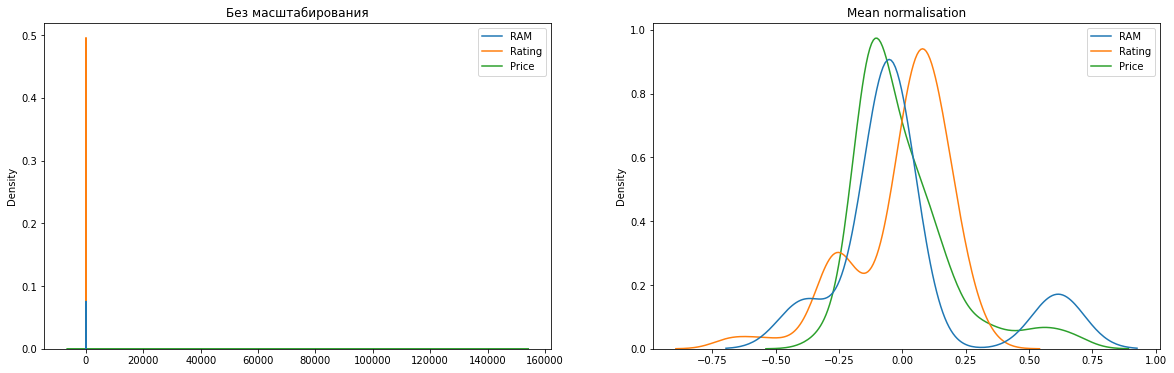

In [32]:
draw_graph(['RAM', 'Rating', 'Price'], data, data_mn_scale,'Без масштабирования', 'Mean normalisation')

### б) Масштабирование по медиане

In [33]:
rs = RobustScaler()
data_median_scale_arr = rs.fit_transform(data)
data_median_scale = arr_to_df(data_median_scale_arr)
data_median_scale.describe()

,RAM,Rating,Price
count,122.000000,130.000000,130.000000
mean,0.622951,-0.382051,0.311937
std,3.253296,1.216532,0.949236
min,-4.000000,-4.666667,-1.301499
25%,0.000000,-0.666667,-0.350361
50%,0.000000,0.000000,0.000000
75%,0.000000,0.333333,0.649639
max,8.000000,1.666667,3.689062


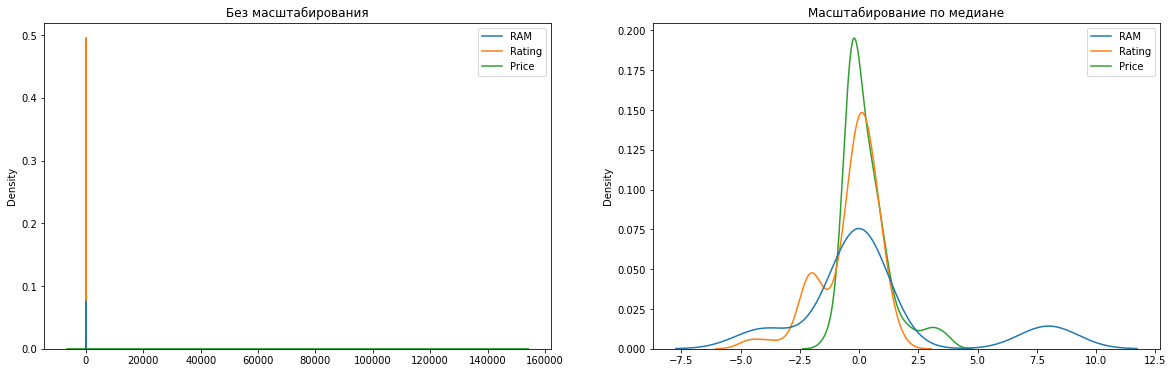

In [34]:
draw_graph(['RAM', 'Rating', 'Price'], data, data_median_scale,'Без масштабирования', 'Масштабирование по медиане')

### б) Масштабирование по максимальному значению

In [35]:
mas = MaxAbsScaler()
data_max_scale_arr = mas.fit_transform(data)
data_max_scale = arr_to_df(data_max_scale_arr)
data_max_scale.describe()

,RAM,Rating,Price
count,122.000000,130.000000,130.000000
mean,0.538934,0.871955,0.415128
std,0.203331,0.076033,0.164395
min,0.250000,0.604167,0.135703
25%,0.500000,0.854167,0.300427
50%,0.500000,0.895833,0.361105
75%,0.500000,0.916667,0.473613
max,1.000000,1.000000,1.000000


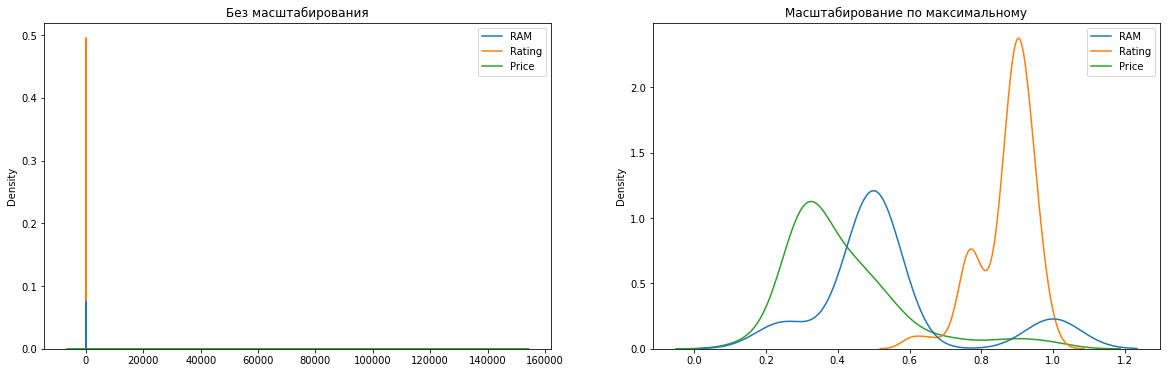

In [36]:
draw_graph(['RAM', 'Rating', 'Price'], data, data_max_scale,'Без масштабирования', 'Масштабирование по максимальному')

## Обработка выбросов(числовые признаки)

In [37]:
col_list = ['RAM', 'Rating', 'Price']
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

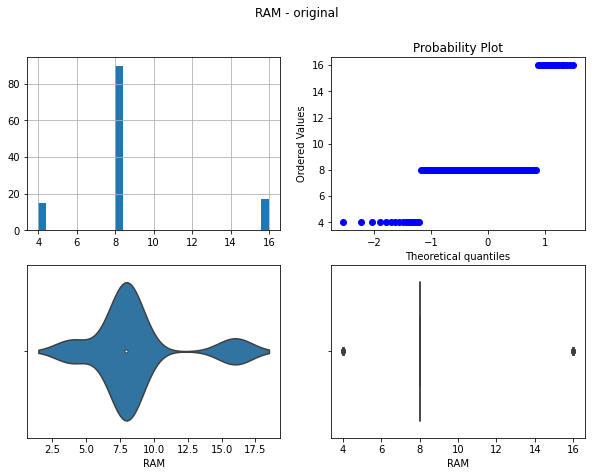

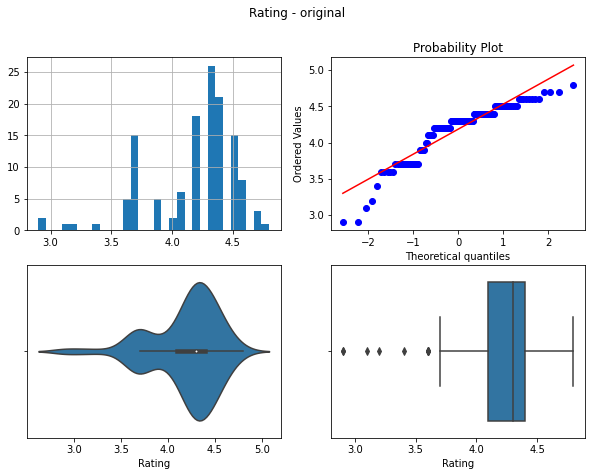

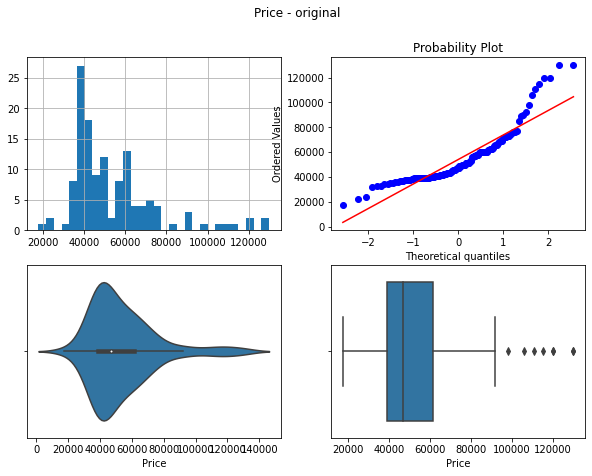

In [38]:
for col in col_list:
    diagnostic_plots(data, col, '{} - original'.format(col))

## Удаление методом межквартильного размаха.

In [39]:
#создадим функцию обнаружения выбросов только для метода межквартильного размаха
def get_outlier_boundaries(df, col):
    K2 = 1.5
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
    upper_boundary = df[col].quantile(0.75) + (K2 * IQR)
    return lower_boundary, upper_boundary 

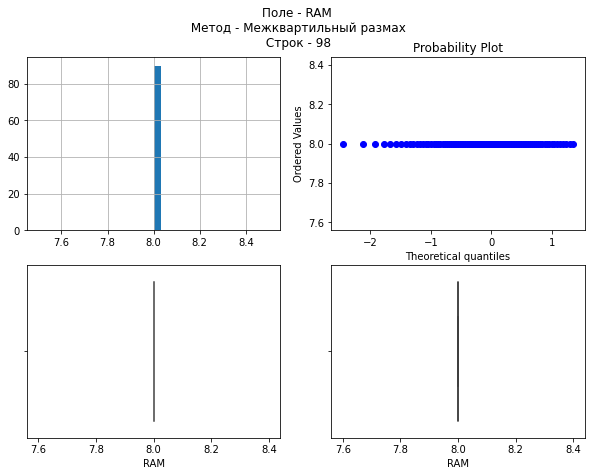

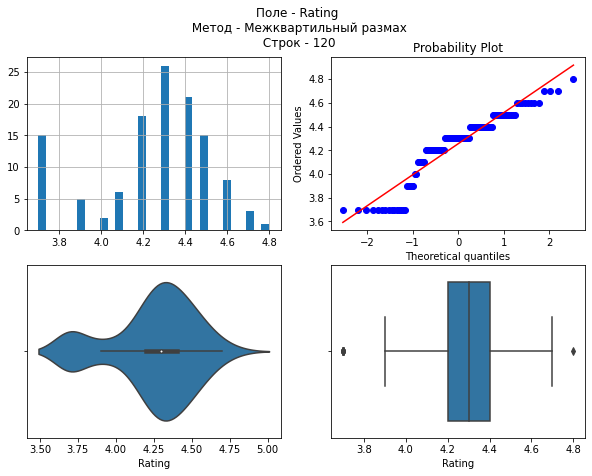

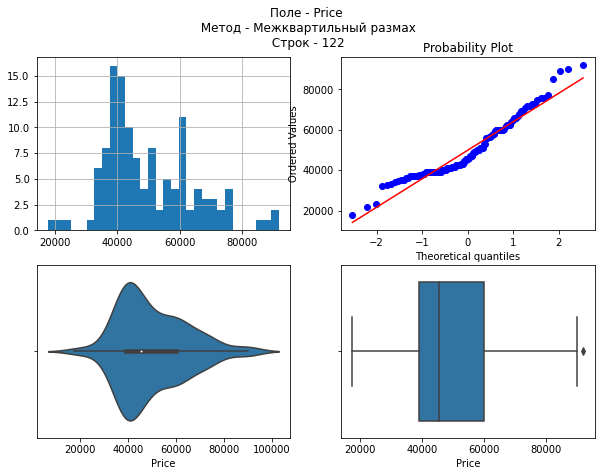

In [40]:
obt = 'Межквартильный размах'
for col in col_list:
    # Вычисление верхней и нижней границы
    lower_boundary, upper_boundary = get_outlier_boundaries(data, col)
    # Флаги для удаления выбросов
    outliers_temp = np.where(data[col] > upper_boundary, True, 
                            np.where(data[col] < lower_boundary, True, False))
    # Удаление данных на основе флага
    data_trimmed = data.loc[~(outliers_temp), ]  
    title = 'Поле - {}\n Метод - {}\n Строк - {}'.format(col, obt, data_trimmed.shape[0])
    diagnostic_plots(data_trimmed, col, title)

## Замена выбросов методом трёх сигм

In [41]:
def get_outlier_boundaries_sigm(df, col):
    K1 = 3
    lower_boundary = df[col].mean() - (K1 * df[col].std())
    upper_boundary = df[col].mean() + (K1 * df[col].std())
    return lower_boundary, upper_boundary 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


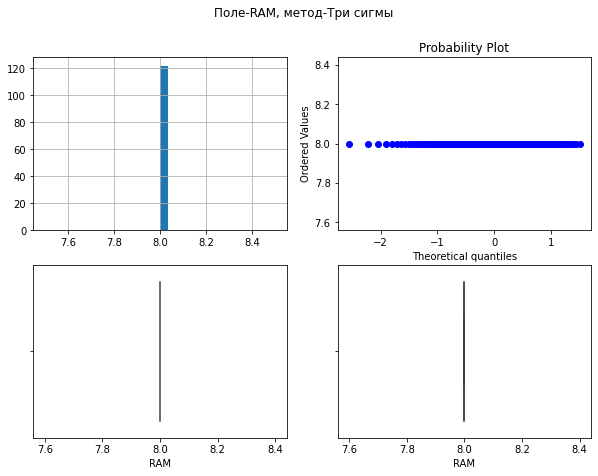

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


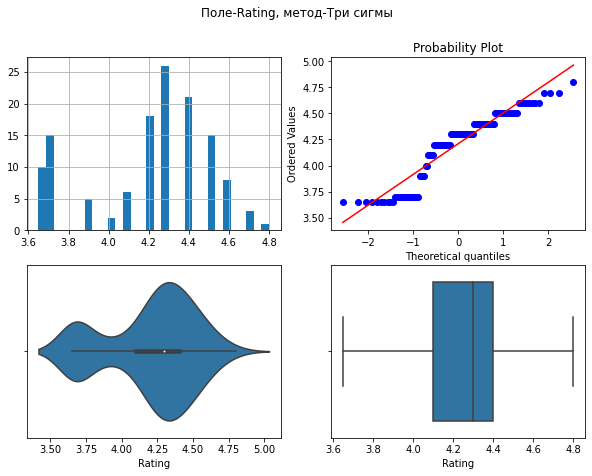

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


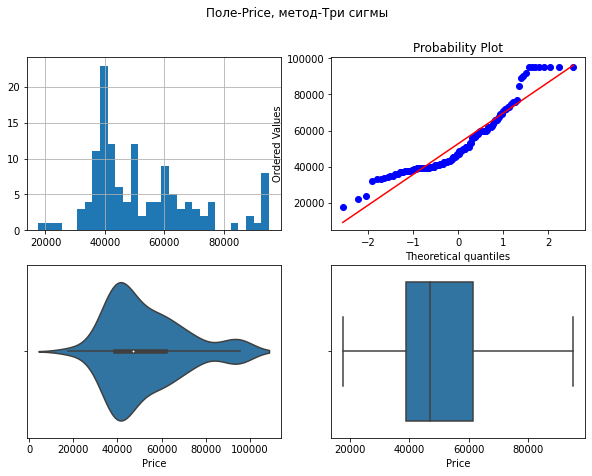

In [42]:
obt2 = 'Три сигмы'
for col in col_list:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt2)
        diagnostic_plots(data, col, title)

## Обработка нестандартных признаков

In [50]:
data_in = pd.read_csv('/content/drive/MyDrive/MMO/T1.csv', sep = ',')

In [51]:
data_input = data_in.iloc[0:2000, :]

In [52]:
data_input

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
1995,15 01 2018 00:10,0.000000,7.724926,1376.629419,64.410423
1996,15 01 2018 00:20,0.000000,7.617460,1319.137824,68.241722
1997,15 01 2018 00:30,0.000000,7.398623,1206.039642,71.063522
1998,15 01 2018 00:40,0.000000,7.692293,1359.019586,72.470627


In [48]:
# def substr_in_url(substr):
#     lsubstr = substr.lower()
#     return data_load.apply(lambda x: 1 if lsubstr in x['OS'].lower() else 0, axis=1)


In [49]:
# data_load['is_get'] = substr_in_url('GET')
# data_load['is_php'] = substr_in_url('PHP')
# data_load['is_js'] = substr_in_url('JS')
# data_load['is_woff'] = substr_in_url('WOFF')
# url_features = ['is_get', 'is_php', 'is_js', 'is_woff']

AttributeError: ignored

In [54]:
#приводим колонку с датой и временем к форме, понятной Datetime
data_input['Date/Time'] = data_input.apply(lambda x: pd.to_datetime(x['Date/Time'], format='%d %m %Y %H:%M'), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
# День
data_input['day'] = data_input['Date/Time'].dt.day
# Месяц
data_input['month'] = data_input['Date/Time'].dt.month
# Год
data_input['year'] = data_input['Date/Time'].dt.year
# Часы
data_input['hour'] = data_input['Date/Time'].dt.hour
#Минуты
data_input['minute'] = data_input['Date/Time'].dt.minute
#Секунды
data_input['second'] = data_input['Date/Time'].dt.second
#Неделя года
data_input['week'] = data_input['Date/Time'].dt.isocalendar().week
#Квартал
data_input['quarter'] = data_input['Date/Time'].dt.quarter
#День недели 
data_input['dayofweek'] = data_input['Date/Time'].dt.dayofweek
#Выходной день
data_input['day_name'] = data_input['Date/Time'].dt.day_name()
#data_load['is_holiday'] = data.apply(lambda x: 1 if x['dt'].dayofweek in [5,6] else 0, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [57]:
# Создадим масштабируемые признаки для дальнейших экспериментов
dt_features = ['year', 'day', 'month', 'hour', 'minute', 'second', 'week', 'quarter', 'dayofweek']
dt_features_scaled = []
for f in dt_features:
    f_new = str(f + '_scaled')
    dt_features_scaled.append(f_new)
    data_input[f_new] = MinMaxScaler().fit_transform(data_input[[f]])
dt_features_scaled

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

['year_scaled',
 'day_scaled',
 'month_scaled',
 'hour_scaled',
 'minute_scaled',
 'second_scaled',
 'week_scaled',
 'quarter_scaled',
 'dayofweek_scaled']

In [58]:
#функция кодировки значения синусом или косинусом
def round_code(v, T, cos_flag = True):
    x = 2*np.pi*v/T
    if cos_flag:
        return np.cos(x)
    else:
        return np.sin(x)

In [59]:
# Опеределим периоды для признаков
for f in dt_features:
    print(f, data_input[f].min(), data_input[f].max())

year 2018 2018
day 1 15
month 1 1
hour 0 23
minute 0 50
second 0 0
week 1 3
quarter 1 1
dayofweek 0 6


In [60]:
dt_features_periods = [0, 31, 12, 24, 60, 60, 52, 4, 7]

In [61]:
#Датафрейм большой и при его фрагментации нам попались только значения из 2010 года, поэтому колонку года не кодируем
# объявлем dt_features_round пустым, чтобы инициировать массив для дальнейшей работы с ним
dt_features_round = [] 

In [62]:
%%time
# Построим отображение признаков на круг, год пропускаем
for f,p in zip(dt_features[1:], dt_features_periods[1:]):
    f_cos = str(f + '_cos')
    f_sin = str(f + '_sin')
    data_input[f_cos] = data_input.apply(lambda x: round_code(x[f], p), axis=1)
    data_input[f_sin] = data_input.apply(lambda x: round_code(x[f], p, False), axis=1)
    dt_features_round.append(f_cos)
    dt_features_round.append(f_sin)
dt_features_round    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


CPU times: user 585 ms, sys: 3.11 ms, total: 588 ms
Wall time: 595 ms


In [63]:
data_input

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),day,month,year,hour,minute,...,minute_cos,minute_sin,second_cos,second_sin,week_cos,week_sin,quarter_cos,quarter_sin,dayofweek_cos,dayofweek_sin
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,2018,0,0,...,1.0,0.000000e+00,1.0,0.0,0.992709,0.120537,6.123234e-17,1.0,1.0,0.0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,2018,0,10,...,0.5,8.660254e-01,1.0,0.0,0.992709,0.120537,6.123234e-17,1.0,1.0,0.0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,2018,0,20,...,-0.5,8.660254e-01,1.0,0.0,0.992709,0.120537,6.123234e-17,1.0,1.0,0.0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,2018,0,30,...,-1.0,5.665539e-16,1.0,0.0,0.992709,0.120537,6.123234e-17,1.0,1.0,0.0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,2018,0,40,...,-0.5,-8.660254e-01,1.0,0.0,0.992709,0.120537,6.123234e-17,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2018-01-15 00:10:00,0.000000,7.724926,1376.629419,64.410423,15,1,2018,0,10,...,0.5,8.660254e-01,1.0,0.0,0.935016,0.354605,6.123234e-17,1.0,1.0,0.0
1996,2018-01-15 00:20:00,0.000000,7.617460,1319.137824,68.241722,15,1,2018,0,20,...,-0.5,8.660254e-01,1.0,0.0,0.935016,0.354605,6.123234e-17,1.0,1.0,0.0
1997,2018-01-15 00:30:00,0.000000,7.398623,1206.039642,71.063522,15,1,2018,0,30,...,-1.0,5.665539e-16,1.0,0.0,0.935016,0.354605,6.123234e-17,1.0,1.0,0.0
1998,2018-01-15 00:40:00,0.000000,7.692293,1359.019586,72.470627,15,1,2018,0,40,...,-0.5,-8.660254e-01,1.0,0.0,0.935016,0.354605,6.123234e-17,1.0,1.0,0.0


In [81]:
data_input.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),day,month,year,hour,minute,...,minute_cos,minute_sin,second_cos,second_sin,week_cos,week_sin,quarter_cos,quarter_sin,dayofweek_cos,dayofweek_sin
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,2018,0,0,...,1.0,0.000000e+00,1.0,0.0,0.992709,0.120537,6.123234e-17,1.0,1.0,0.0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,2018,0,10,...,0.5,8.660254e-01,1.0,0.0,0.992709,0.120537,6.123234e-17,1.0,1.0,0.0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,2018,0,20,...,-0.5,8.660254e-01,1.0,0.0,0.992709,0.120537,6.123234e-17,1.0,1.0,0.0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,2018,0,30,...,-1.0,5.665539e-16,1.0,0.0,0.992709,0.120537,6.123234e-17,1.0,1.0,0.0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,2018,0,40,...,-0.5,-8.660254e-01,1.0,0.0,0.992709,0.120537,6.123234e-17,1.0,1.0,0.0


In [82]:
data_input.dtypes

Date/Time                        datetime64[ns]
LV ActivePower (kW)                     float64
Wind Speed (m/s)                        float64
Theoretical_Power_Curve (KWh)           float64
Wind Direction (°)                      float64
day                                       int64
month                                     int64
year                                      int64
hour                                      int64
minute                                    int64
second                                    int64
week                                     UInt32
quarter                                   int64
dayofweek                                 int64
day_name                                 object
year_scaled                             float64
day_scaled                              float64
month_scaled                            float64
hour_scaled                             float64
minute_scaled                           float64
second_scaled                           

## Отбор признаков

In [83]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_X = wine.data
wine_y = wine.target
wine_feature_names = wine['feature_names']
wine_x_df = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

In [65]:
data_class = pd.read_csv('/content/drive/MyDrive/MMO/T1.csv', sep=",")
#data_data = data_class.iloc[:, 2:23] #data_data = data_class.iloc[:, 1:22]
#data_targ = data_class[['class']]
#data_data
data_class.shape

(50530, 5)

In [66]:
data_class.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [67]:
data_data = data_class.iloc[:, 0:9] #data_data = data_class.iloc[:, 1:22]
data_targ = data_class[['Date/Time']]
data_data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


##  Методы фильтрации (Filter)

In [68]:
data_class['LV ActivePower (kW)'].unique()

array([ 380.04779053,  453.76919556,  306.37658691, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

In [69]:
data_class['Wind Speed (m/s)'].unique()

array([5.31133604, 5.67216682, 5.2160368 , ..., 8.43535805, 9.42136574,
       9.97933197])

In [70]:
data_copy = data_data.iloc[:, 3:8]

In [71]:
# удаление константных и псевдоконстантных признаков
selector_fm = VarianceThreshold(threshold = 0.15)
selector_fm.fit(data_copy)
selector_fm.variances_

array([1871436.86226526,    8731.55894383])

In [72]:
selector_fm.transform(data_copy)

array([[ 416.32890782,  259.99490356],
       [ 519.91751106,  268.64111328],
       [ 390.90001581,  272.56478882],
       ...,
       [1788.28475526,   84.74250031],
       [2418.38250336,   84.2979126 ],
       [2779.18409628,   82.27462006]])

Была удалена колонка мощности.

## Методы обертывания (Wrapper)

### Алгоритмы полного перебора

In [12]:
import sklearn.externals
import joblib
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

ModuleNotFoundError: ignored

In [97]:
# from sklearn.feature_selection import ExhaustiveFeatureSelector as EFS
# !pip install sklearn.externals.joblib
# !pip install mlxtend.externals.joblib
!pip install mlxtend
import joblib
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
knn = KNeighborsClassifier(n_neighbors=3)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ModuleNotFoundError: ignored

In [88]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(wine_X, wine_y, custom_feature_names=wine_feature_names)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

TypeError: ignored

In [103]:
#Sequential Forward Selection

X = data_data
targ_y = data_targ
y = np.ravel(targ_y)
feature_names = ('LV ActivePower (kW)', 'Wind Speed (m/s)',	'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)')

knn = KNeighborsClassifier(n_neighbors=2)

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X, y, custom_feature_names=feature_names)
sfs1.subsets_

TypeError: ignored

In [ ]:
print('Best subset (corresponding names): ', sfs1.k_feature_names_)

Признак не вошёл в лучшие результаты для модели.

## Методы вложений (Embedded)

Воспользуемся моделью логистической регрессии, поскольку имеем задачу классификации:

In [104]:
x_val = X.values.tolist()

In [107]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C= 1000, solver='liblinear', penalty='l1', max_iter = 5300, random_state=2)
e_lr1.fit(wine_X, wine_y)
# Коэффициенты регрессии
e_lr1.coef_

array([[ 1.37912312e+00,  4.33442776e+00,  1.70113311e+01,
        -2.26973979e+00,  2.31140125e-02,  2.23434923e-01,
         8.61543900e+00,  0.00000000e+00, -5.38287684e+00,
        -1.32531249e+00, -6.69496906e+00,  2.35497029e+00,
         5.90054666e-02],
       [-5.65064927e-01, -2.74432449e+00, -1.27556276e+01,
         1.12730095e+00, -4.07412833e-02,  1.05252258e+00,
         2.10029543e+00,  1.03676545e+01,  3.05372817e+00,
        -5.08045413e+00,  1.74306550e+01, -3.01429523e+00,
        -3.34762317e-02],
       [ 3.76083078e-01,  2.29502667e+00,  2.26158171e+00,
         2.05484569e-01,  4.77020330e-02,  4.01338505e-01,
        -1.08009107e+01, -1.30485005e+01, -4.05884641e+00,
         2.85554954e+00, -1.20531253e+01, -6.68535133e+00,
         8.69123622e-03]])

In [108]:
#Все четыре признака оказались хорошими!
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(wine_X, wine_y)
list(zip(feature_names, sel_e_lr1.get_support()))

[('LV ActivePower (kW)', True),
 ('Wind Speed (m/s)', True),
 ('Theoretical_Power_Curve (KWh)', True),
 ('Wind Direction (°)', True)]

Оказались хорошими для модели признаки.